Number of TTI to resend: 20
Alpha for Proportional Fair: 0.2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

   MCS/RB   1    2    3    4    5    6    7    8    9  ...    91    92    93  \
0       0  32   64   96  128  168  208  240  272  304  ...  3104  3104  3240   
1       1  40   88  128  176  224  272  304  352  408  ...  3976  4040  4104   
2       2  48  104  160  224  272  320  384  432  504  ...  4872  5000  5000   
3       3  64  136  208  288  352  432  504  576  640  ...  6408  6536  6536   
4       4  80  168  256  352  432  528  608  704  808  ...  7808  7936  8064   

     94    95    96    97    98    99   100  
0  3240  3240  3240  3368  3368  3368  3368  
1  4104  4232  4232  4232  4360  4360  4360  
2  5128  5128  5256  5256  5256  5384  5384  
3  6664  6664  6792  6792  6920  6920  7048  
4  8064  8192  8192  8456  8456  8456  8712  

[5 rows x 101 columns]


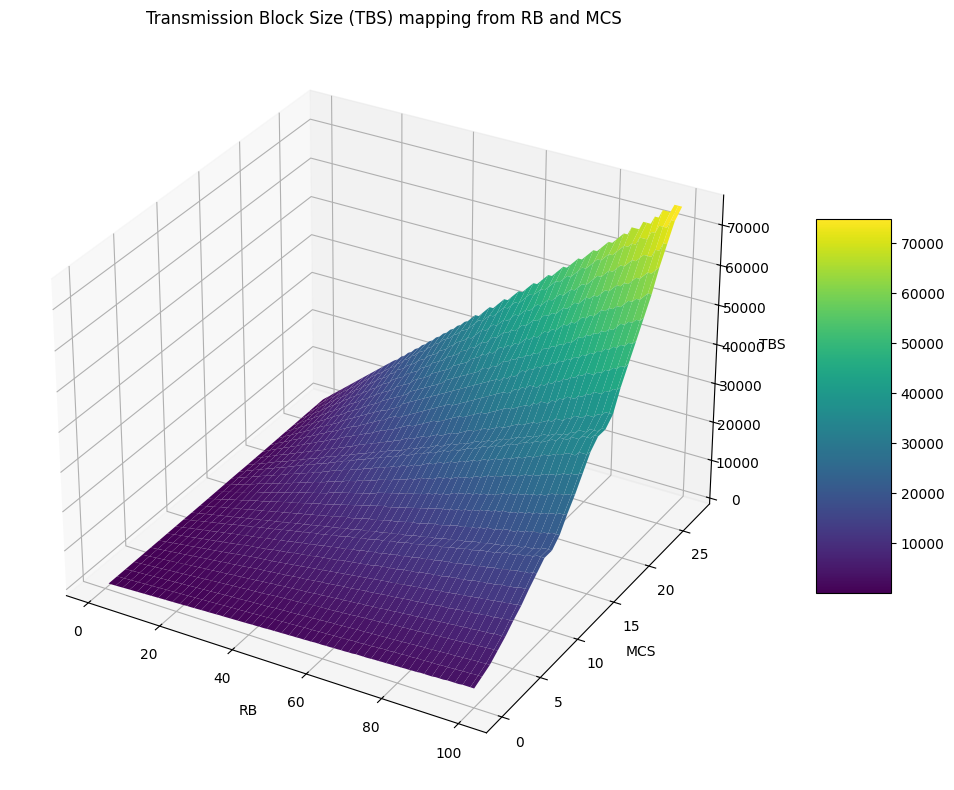

In [2]:
TBS = pd.read_csv('./Simulation/TBSArray.csv')

print(TBS.head(5))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(1, 101)  # RB
Y = np.arange(0, 28)   # MCS
X, Y = np.meshgrid(X, Y)
Z = TBS.iloc[:, 1:].astype(float).values

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('RB')
ax.set_ylabel('MCS')
ax.set_zlabel('TBS')
ax.set_title('Transmission Block Size (TBS) mapping from RB and MCS')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

In [3]:
# Burst Traffic
RoundRobin_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/rr.csv')
MaxCQI_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/max_cqi.csv')
PF_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/pf.csv')

# High Traffic
RoundRobin_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/rr.csv')
MaxCQI_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/max_cqi.csv')
PF_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/pf.csv')

# Ideal Traffic 100000 bits
RoundRobin_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/rr.csv')
MaxCQI_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/max_cqi.csv')
PF_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/pf.csv')

# Low Traffic
RoundRobin_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/rr.csv')
MaxCQI_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/max_cqi.csv')
PF_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/pf.csv')

# Mobility Pattern
RoundRobin_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/rr.csv')
MaxCQI_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/max_cqi.csv')
PF_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/pf.csv')


# Create DataFrame for each property such as: Scheduler Count, Avg Throughput, Max Delay, Avg Delay having 4 columns is UE, RoundRobin, MaxCQI, PF
ue = [col for col in RoundRobin_BurstTraffic.columns if col.startswith('UE')]
scheduler_count_DF1 = pd.DataFrame(index=ue)
avg_throughput_DF1 = pd.DataFrame(index=ue)
max_delay_DF1 = pd.DataFrame(index=ue)
avg_delay_DF1 = pd.DataFrame(index=ue)

scheduler_count_DF2 = pd.DataFrame(index=ue)
avg_throughput_DF2 = pd.DataFrame(index=ue)
max_delay_DF2 = pd.DataFrame(index=ue)
avg_delay_DF2 = pd.DataFrame(index=ue)

scheduler_count_DF3 = pd.DataFrame(index=ue)
avg_throughput_DF3 = pd.DataFrame(index=ue)
max_delay_DF3 = pd.DataFrame(index=ue)
avg_delay_DF3 = pd.DataFrame(index=ue)

scheduler_count_DF4 = pd.DataFrame(index=ue)
avg_throughput_DF4 = pd.DataFrame(index=ue)
max_delay_DF4 = pd.DataFrame(index=ue)
avg_delay_DF4 = pd.DataFrame(index=ue)

scheduler_count_DF5 = pd.DataFrame(index=ue)
avg_throughput_DF5 = pd.DataFrame(index=ue)
max_delay_DF5 = pd.DataFrame(index=ue)
avg_delay_DF5 = pd.DataFrame(index=ue)

scenario = ['Burst Traffic', 'High Traffic', 'Ideal Traffic', 'Low Traffic', 'Mobility Pattern']
total_throughput_DF1 = pd.DataFrame(index=scenario, columns=['Round Robin', 'Max CQI', 'PF'])

## Burst Traffic

### Round Robin

In [4]:
ue = [col for col in RoundRobin_BurstTraffic.columns if col.startswith('UE')]
RoundRobin_BurstTraffic_UE = RoundRobin_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF1['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['Round Robin'] = summary['Max Delay']
avg_delay_DF1['Round Robin'] = summary['Avg Delay']

total_throughput_DF1.at['Burst Traffic', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 18.227228 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              2377                25              18.100928       18.0   
UE1              2416                25              18.016704       19.0   
UE2              2379                25              18.034376       20.0   
UE3              2420                25              18.403528       20.0   
UE4              2416                25              18.357040       20.0   
UE5              2408                25              18.387040       19.0   
UE6              2364                25              18.116560       18.0   
UE7              2489                25              18.368856       21.0   
UE8              2419                25              18.424656       19.0   
UE9              2403                25              18.106960       19.0   
UE10             2384                25              18.246088       20.0  

### Max C_I

In [5]:
ue = [col for col in MaxCQI_BurstTraffic.columns if col.startswith('UE')]
MaxCQI_BurstTraffic_UE = MaxCQI_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF1['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['Max CQI'] = summary['Max Delay']
avg_delay_DF1['Max CQI'] = summary['Avg Delay']

total_throughput_DF1.at['Burst Traffic', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 18.639831 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              2273                25              18.636696       82.0   
UE1              2275                25              18.479544       78.0   
UE2              2264                25              18.548112       78.0   
UE3              2302                25              18.885400       97.0   
UE4              2262                25              18.832400       75.0   
UE5              2266                25              18.771600       85.0   
UE6              2218                25              18.491384       86.0   
UE7              2321                25              18.649688      135.0   
UE8              2247                25              18.784752       95.0   
UE9              2216                25              18.460568      137.0   
UE10             2223                25              18.663208      110.0  

### Proportional Fair

In [6]:
ue = [col for col in PF_BurstTraffic.columns if col.startswith('UE')]
PF_BurstTraffic_UE = PF_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['PF'] = summary['Scheduler Count']
avg_throughput_DF1['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['PF'] = summary['Max Delay']
avg_delay_DF1['PF'] = summary['Avg Delay']

total_throughput_DF1.at['Burst Traffic', 'PF'] = total_throughput_mbps



Avg Throughput for cell: 18.243569 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              2369                25              18.123128       17.0   
UE1              2405                25              18.051672       19.0   
UE2              2359                25              18.074656       18.0   
UE3              2405                25              18.426584       19.0   
UE4              2406                25              18.356456       18.0   
UE5              2389                25              18.357872       19.0   
UE6              2351                25              18.155504       19.0   
UE7              2475                25              18.391936       19.0   
UE8              2397                25              18.418432       19.0   
UE9              2382                25              18.117760       19.0   
UE10             2366                25              18.271912       19.0  

### Analysics


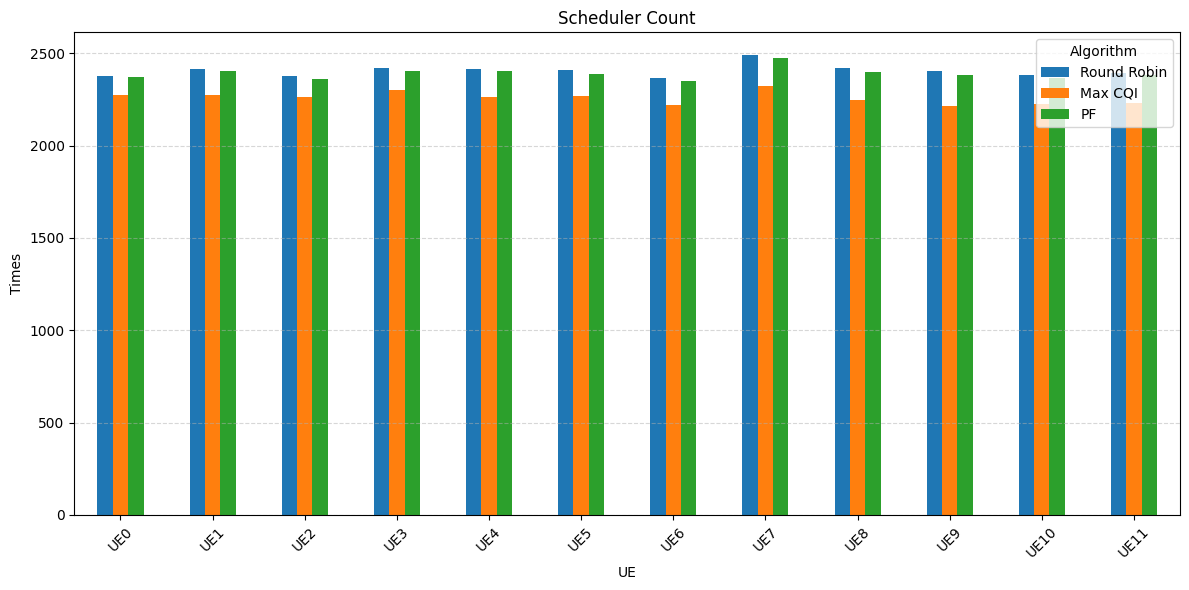

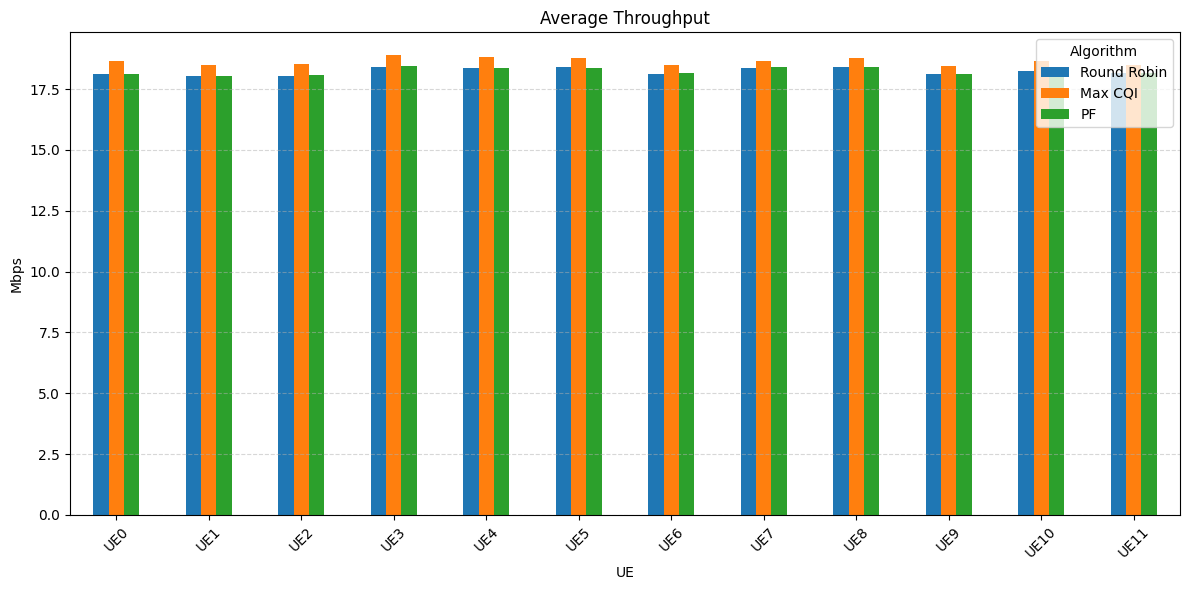

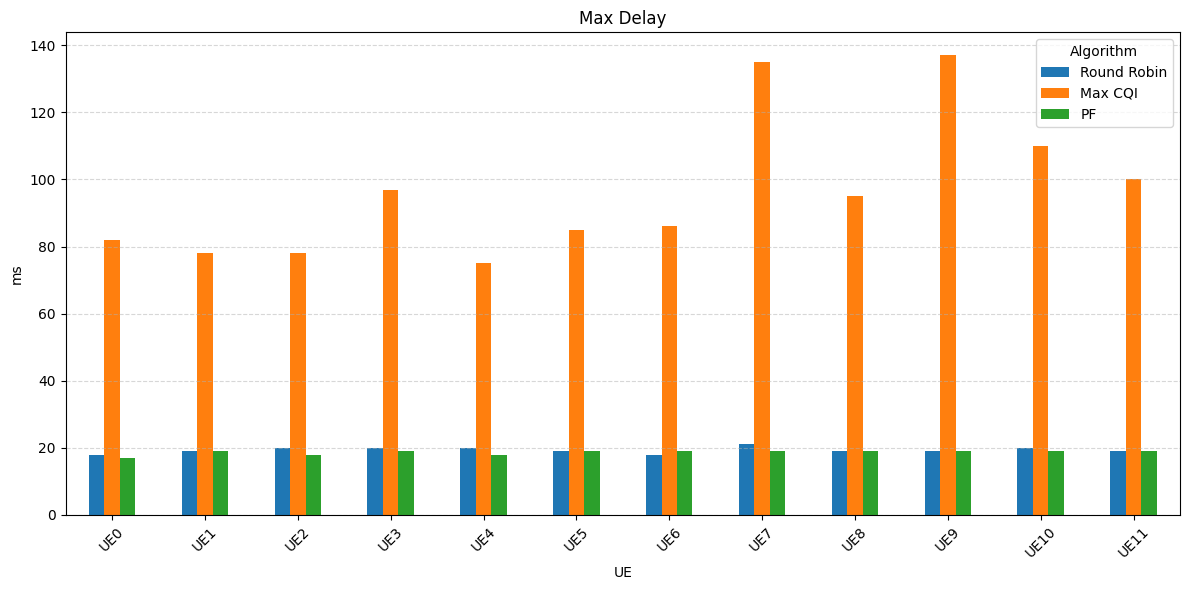

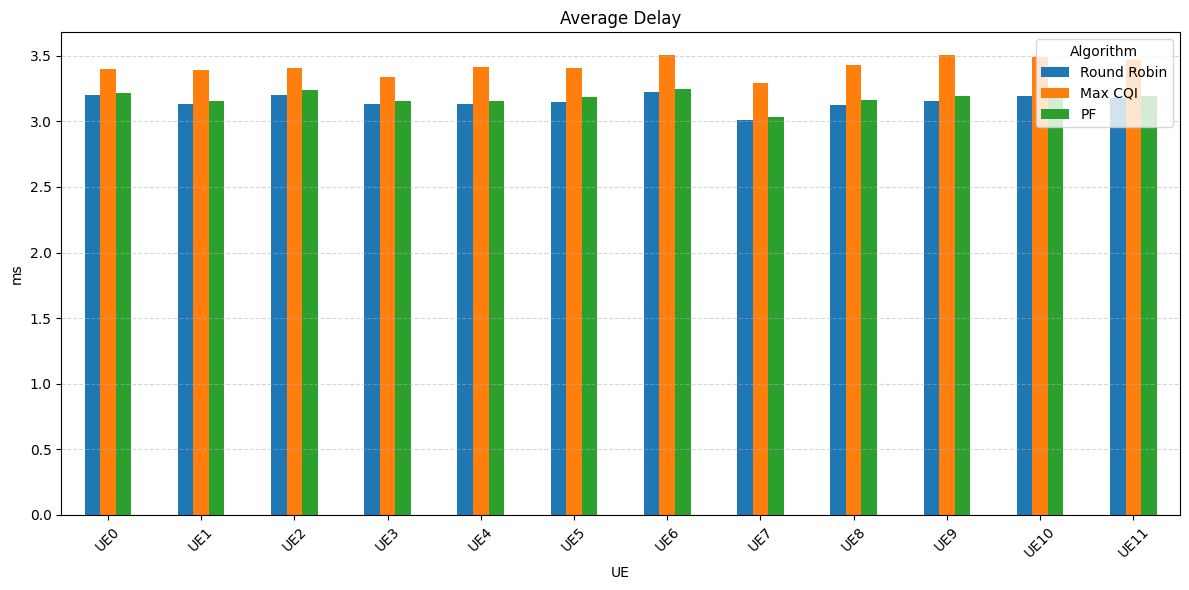

In [7]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF1.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF1.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF1.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF1.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## High Traffic

### Round Robin

In [8]:
ue = [col for col in RoundRobin_HighTraffic.columns if col.startswith('UE')]
RoundRobin_HighTraffic_UE = RoundRobin_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

# save summary to CSV
summary.to_csv('./Simulation/result/high_traffic/rr_HighTraffic_summary.csv')

scheduler_count_DF2['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF2['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['Round Robin'] = summary['Max Delay']
avg_delay_DF2['Round Robin'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 23.145079 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              23.384744        2.0   
UE1              3334                25              23.220048        2.0   
UE2              3334                25              22.946960        2.0   
UE3              3334                25              23.222408        2.0   
UE4              3333                25              22.942920        2.0   
UE5              3333                25              23.145416        2.0   
UE6              3333                25              23.029080        2.0   
UE7              3333                25              23.391320        2.0   
UE8              3333                25              23.163552        2.0   
UE9              3333                25              23.235416        2.0   
UE10             3333                25              22.694984        2.0  

### Max C/I

In [9]:
ue = [col for col in MaxCQI_HighTraffic.columns if col.startswith('UE')]
MaxCQI_HighTraffic_UE = MaxCQI_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF2['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF2['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['Max CQI'] = summary['Max Delay']
avg_delay_DF2['Max CQI'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 29.134537 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              4711                25              40.186760      180.0   
UE1              4086                25              34.860192      180.0   
UE2              4052                25              35.088464      140.0   
UE3              4001                25              34.518480      180.0   
UE4              3686                25              31.946832      200.0   
UE5              3448                25              30.180248      240.0   
UE6              3376                25              29.814848      240.0   
UE7              3053                25              27.083296      340.0   
UE8              2764                25              24.469952      320.0   
UE9              2667                25              23.953296      280.0   
UE10             1974                25              17.784616      460.0  

### Proportional Fair

In [10]:
ue = [col for col in PF_HighTraffic.columns if col.startswith('UE')]
PF_HighTraffic_UE = PF_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF2['PF'] = summary['Scheduler Count']
avg_throughput_DF2['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['PF'] = summary['Max Delay']
avg_delay_DF2['PF'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 23.379540 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3335                25              23.607880        5.0   
UE1              3335                25              23.461704        5.0   
UE2              3329                25              23.194240        5.0   
UE3              3327                25              23.435128        5.0   
UE4              3335                25              23.156424        5.0   
UE5              3334                25              23.395944        5.0   
UE6              3329                25              23.283568        5.0   
UE7              3335                25              23.599992        5.0   
UE8              3334                25              23.362048        5.0   
UE9              3336                25              23.477120        5.0   
UE10             3331                25              22.901744        5.0  

### Analysics

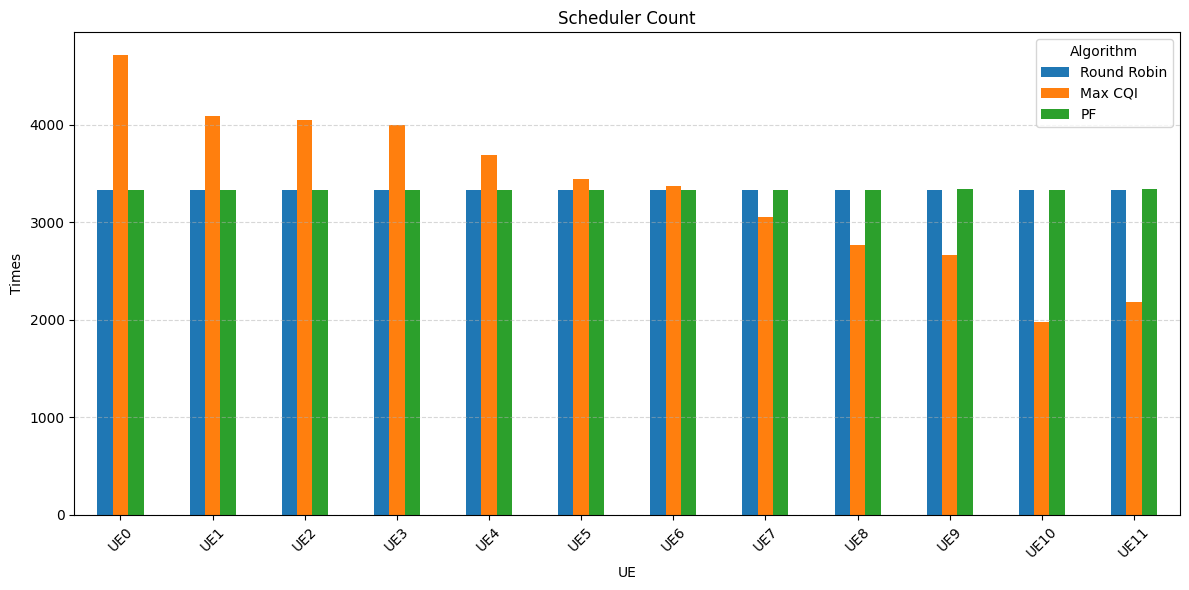

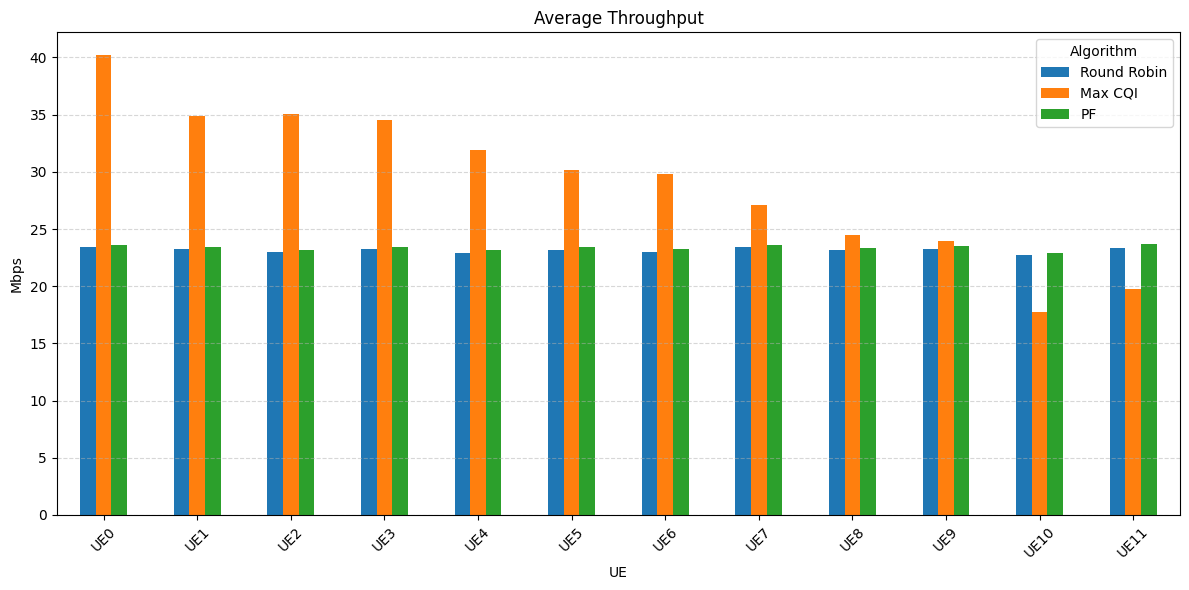

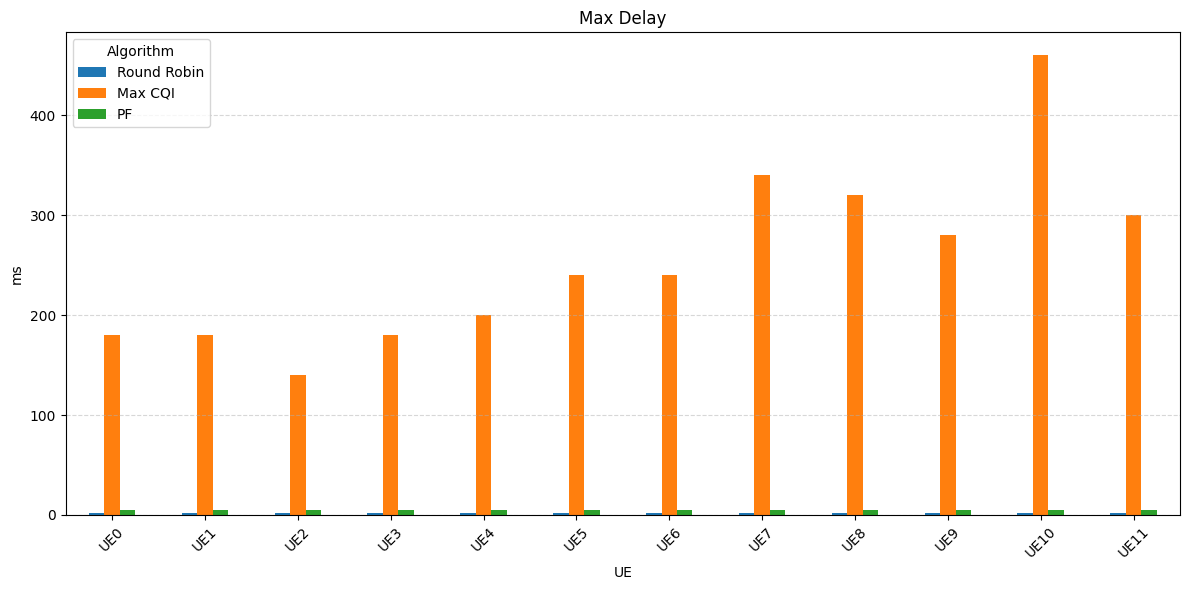

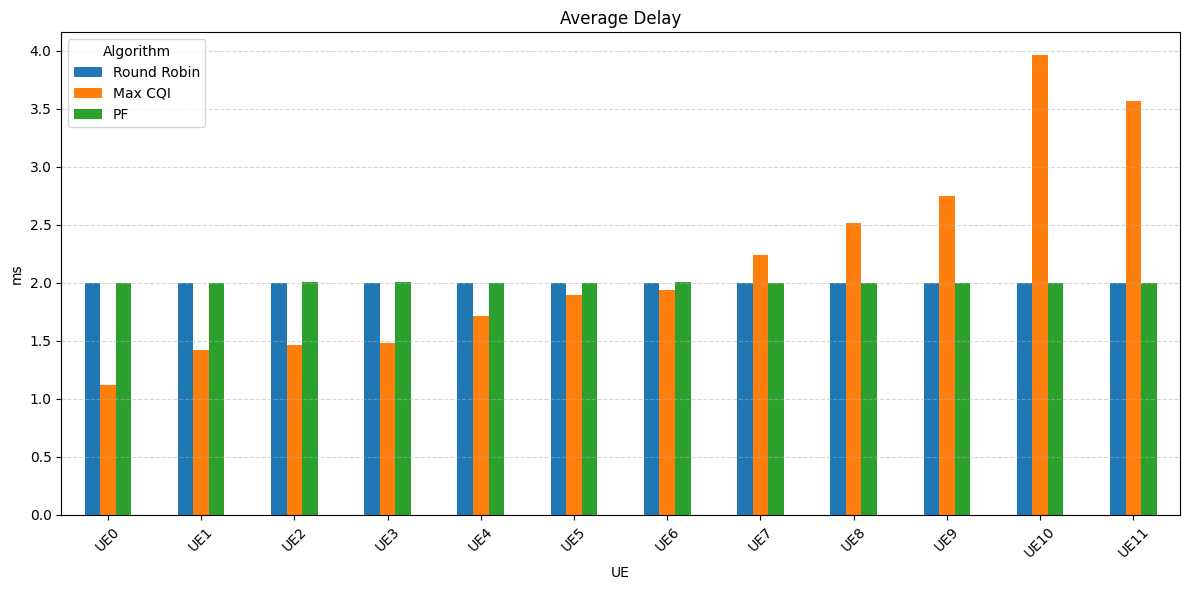

In [11]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF2.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF2.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF2.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF2.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## Ideal 100000bit

### Round Robin

In [12]:
ue = [col for col in RoundRobin_IdealTraffic.columns if col.startswith('UE')]
RoundRobin_IdealTraffic_UE = RoundRobin_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF3['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Round Robin'] = summary['Max Delay']
avg_delay_DF3['Round Robin'] = summary['Avg Delay']


total_throughput_DF1.at['Ideal Traffic', 'Round Robin'] = total_throughput_mbps

Avg Throughput for cell: 28.593023 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3207                25              51.492920       15.0   
UE1              3182                25              51.194784       15.0   
UE2              3188                25              51.348208       15.0   
UE3              3172                25              50.906592       11.0   
UE4              4856                25              34.545032        2.0   
UE5              4284                25              29.908104        2.0   
UE6              3851                25              27.261568        2.0   
UE7              3617                25              26.138056        2.0   
UE8              2778                25               5.137216       83.0   
UE9              2552                25               4.921520       83.0   
UE10             2577                25               4.938984       83.0  

### Max CQI

In [13]:
ue = [col for col in MaxCQI_IdealTraffic.columns if col.startswith('UE')]
MaxCQI_IdealTraffic_UE = MaxCQI_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF3['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Max CQI'] = summary['Max Delay']
avg_delay_DF3['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Ideal Traffic', 'Max CQI'] = total_throughput_mbps

Avg Throughput for cell: 33.159349 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3237                25              51.824584       15.0   
UE1              3216                25              51.623048       15.0   
UE2              3243                25              52.043112       15.0   
UE3              3230                25              51.597624       15.0   
UE4              6671                25              47.630912       14.0   
UE5              6702                25              47.302712       12.0   
UE6              6608                25              46.983784       13.0   
UE7              6562                25              47.475384       13.0   
UE8               140                25               0.358248      816.0   
UE9               133                25               0.359224     1556.0   
UE10              157                25               0.413392     1059.0  

### Proportional Fair

In [14]:
ue = [col for col in PF_IdealTraffic.columns if col.startswith('UE')]
PF_IdealTraffic_UE = PF_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['PF'] = summary['Scheduler Count']
avg_throughput_DF3['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['PF'] = summary['Max Delay']
avg_delay_DF3['PF'] = summary['Avg Delay']

total_throughput_DF1.at['Ideal Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 28.237775 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3223                25              51.667064       11.0   
UE1              3205                25              51.481904       11.0   
UE2              3225                25              51.829488       12.0   
UE3              3218                25              51.454696       12.0   
UE4              3750                25              27.231464        8.0   
UE5              3749                25              26.754560        8.0   
UE6              3753                25              27.061696        8.0   
UE7              3749                25              27.569680        8.0   
UE8              3156                25               5.998776       80.0   
UE9              2915                25               5.782112       80.0   
UE10             2937                25               5.769856       80.0  

### Analysics

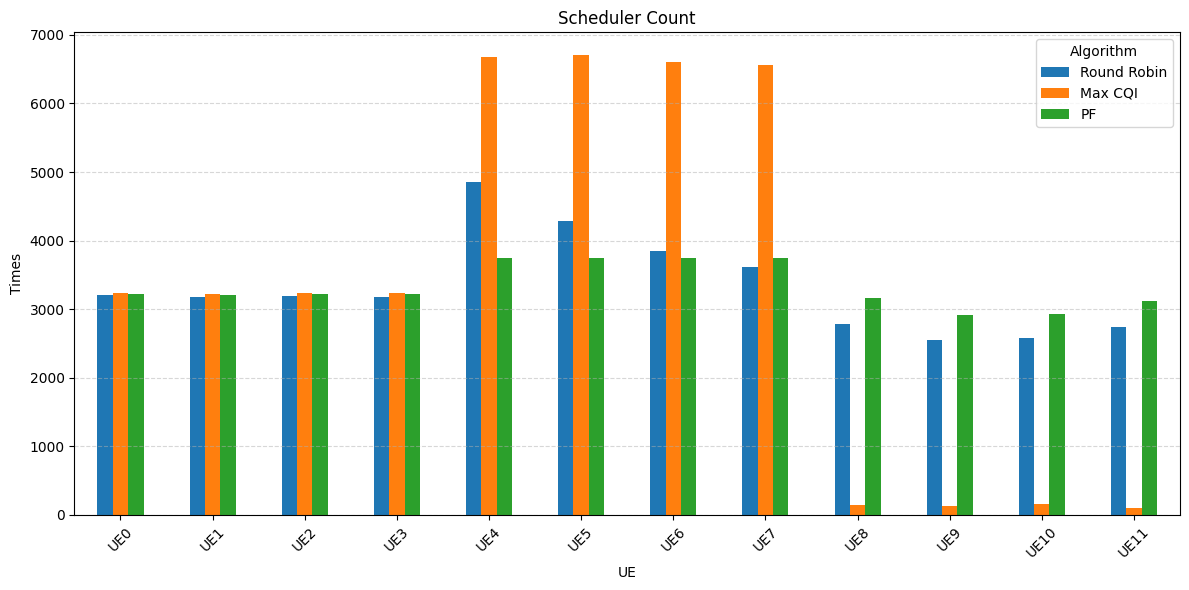

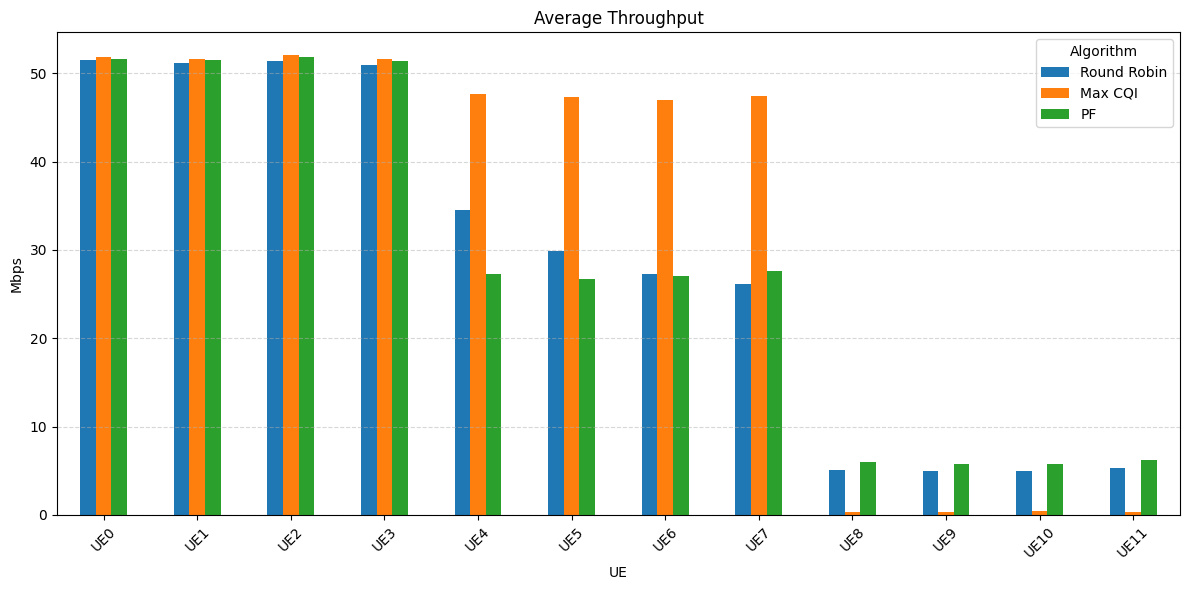

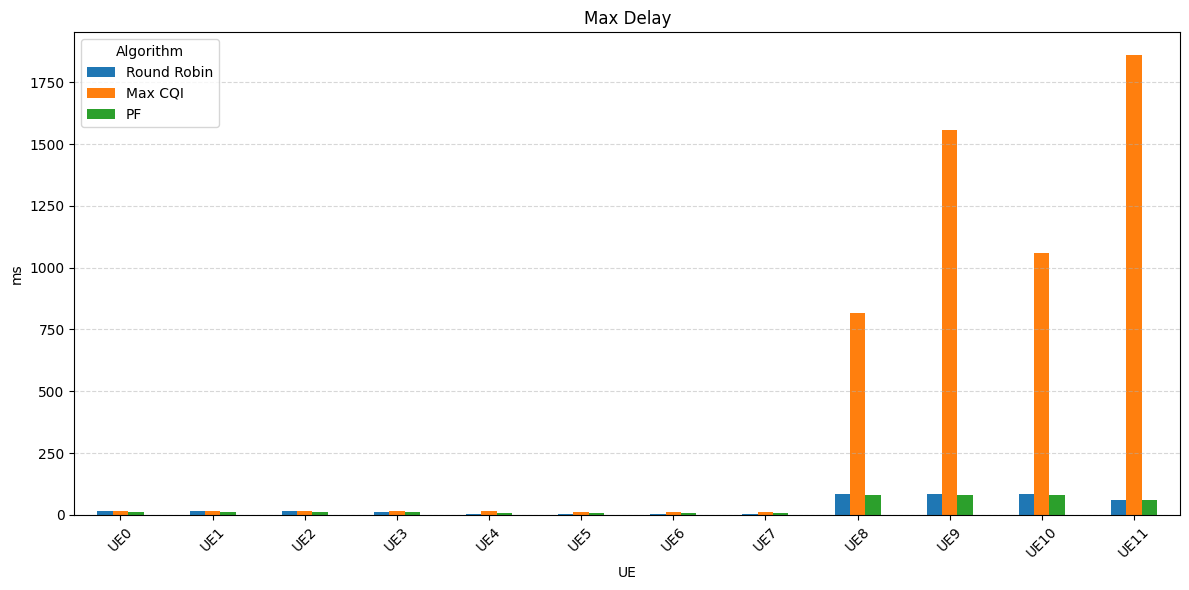

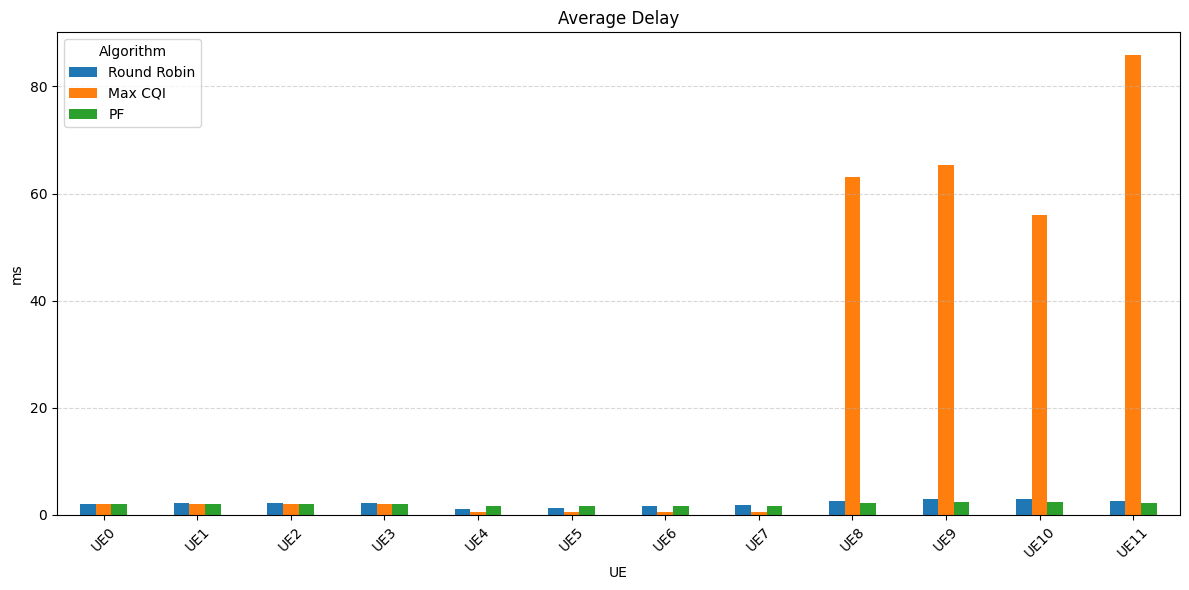

In [15]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF3.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF3.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF3.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF3.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## Mobility Partern

### Round Robin

In [16]:
ue = [col for col in RoundRobin_MobilityPattern.columns if col.startswith('UE')]
RoundRobin_MobilityPattern_UE = RoundRobin_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF4['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['Round Robin'] = summary['Max Delay']
avg_delay_DF4['Round Robin'] = summary['Avg Delay']

total_throughput_DF1.at['Mobility Pattern', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 25.056083 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3156                25              24.666664       14.0   
UE1              3415                25              24.496624       17.0   
UE2              3331                25              24.974736       17.0   
UE3              3196                25              24.885256       18.0   
UE4              3157                25              24.752384       17.0   
UE5              3493                25              25.081592       17.0   
UE6              3338                25              25.433416       14.0   
UE7              3229                25              25.254224       17.0   
UE8              3190                25              25.111232       17.0   
UE9              3515                25              25.465936       17.0   
UE10             3301                25              25.348624       16.0  

### Max CQI

In [17]:
ue = [col for col in MaxCQI_MobilityPattern.columns if col.startswith('UE')]
MaxCQI_MobilityPattern_UE = MaxCQI_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF4['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['Max CQI'] = summary['Max Delay']
avg_delay_DF4['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Mobility Pattern', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 26.079736 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3617                25              26.571240      174.0   
UE1              3534                25              25.741960      254.0   
UE2              3528                25              26.297472      192.0   
UE3              3537                25              26.348936      220.0   
UE4              3261                25              25.753440      228.0   
UE5              3192                25              25.574056      234.0   
UE6              3217                25              26.158720      252.0   
UE7              3269                25              26.192928      232.0   
UE8              3180                25              26.034616      269.0   
UE9              3043                25              26.018840      258.0   
UE10             3106                25              26.140504      261.0  

### Proportional Fair

In [18]:
ue = [col for col in PF_MobilityPattern.columns if col.startswith('UE')]
PF_MobilityPattern_UE = PF_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['PF'] = summary['Scheduler Count']
avg_throughput_DF4['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['PF'] = summary['Max Delay']
avg_delay_DF4['PF'] = summary['Avg Delay']


total_throughput_DF1.at['Mobility Pattern', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 25.127055 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3265                25              24.913240       16.0   
UE1              3230                25              24.281272       18.0   
UE2              3277                25              24.917608       18.0   
UE3              3286                25              25.078968       18.0   
UE4              3285                25              25.046536       18.0   
UE5              3288                25              24.941736       18.0   
UE6              3310                25              25.442400       16.0   
UE7              3323                25              25.468456       18.0   
UE8              3303                25              25.298440       18.0   
UE9              3319                25              25.282712       17.0   
UE10             3317                25              25.421360       18.0  

### Analysics

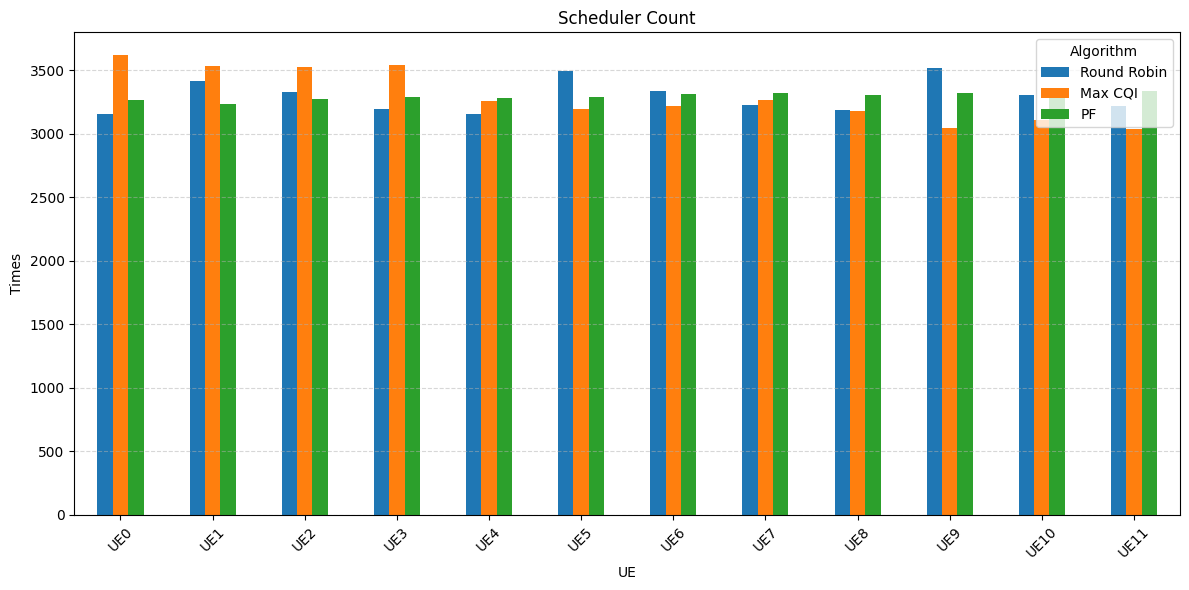

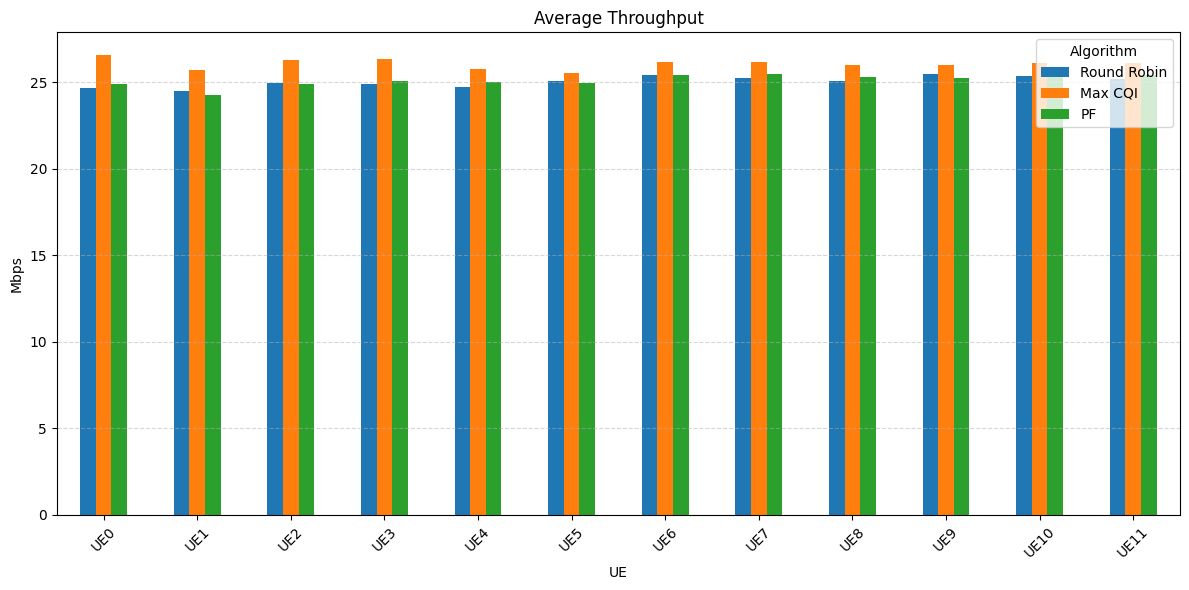

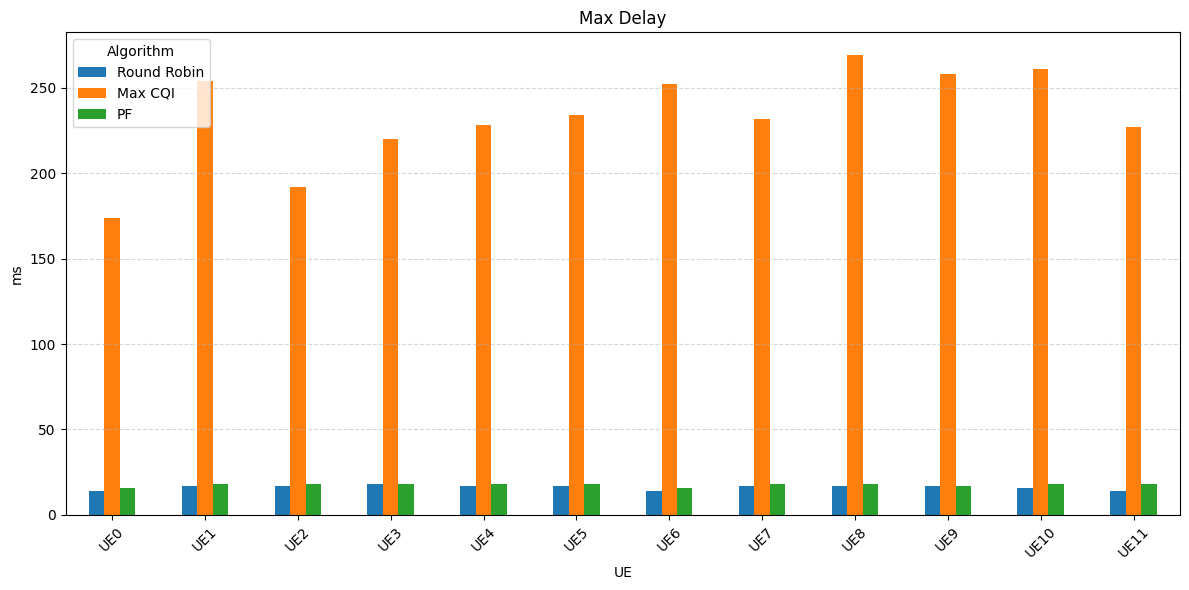

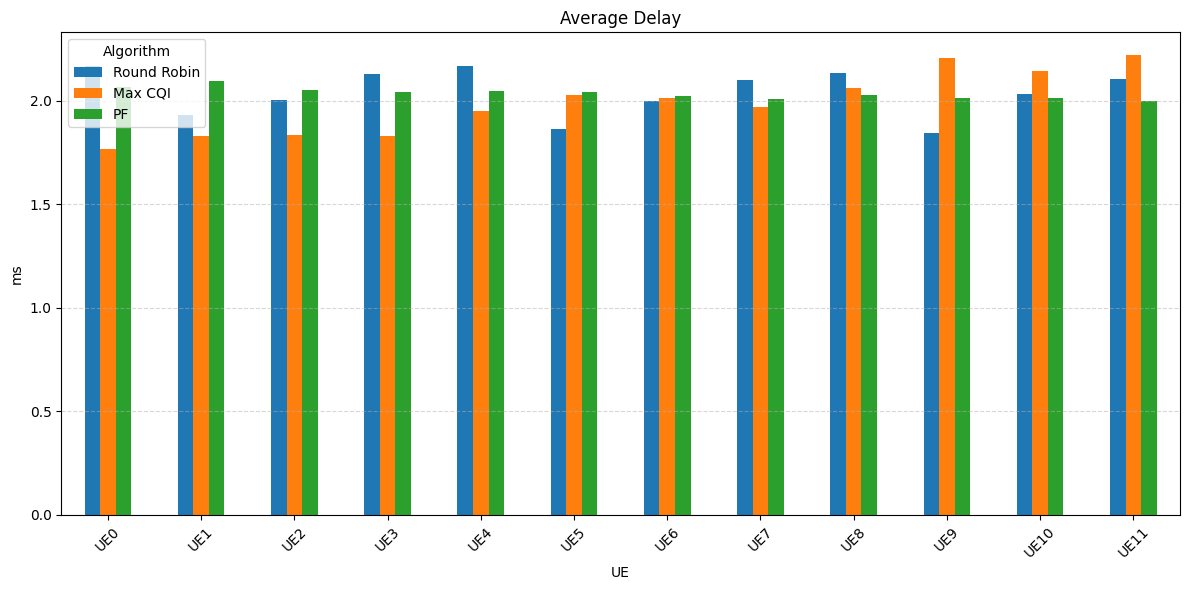

In [19]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF4.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF4.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF4.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF4.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## Low traffic

### Round Robin

In [20]:
ue = [col for col in RoundRobin_LowTraffic.columns if col.startswith('UE')]
RoundRobin_LowTraffic_UE = RoundRobin_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF5['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['Round Robin'] = summary['Max Delay']
avg_delay_DF5['Round Robin'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'Round Robin'] = total_throughput_mbps

Avg Throughput for cell: 10.898121 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0               746                25              11.103448       21.0   
UE1               715                25              10.610592       21.0   
UE2               734                25              10.875280       21.0   
UE3               718                25              10.751672       21.0   
UE4               747                25              11.060864       21.0   
UE5               729                25              10.897424       21.0   
UE6               722                25              10.796152       21.0   
UE7               744                25              11.006152       21.0   
UE8               735                25              10.972384       21.0   
UE9               735                25              10.910664       21.0   
UE10              745                25              11.042528       21.0  

### Max CQI

In [21]:
ue = [col for col in MaxCQI_LowTraffic.columns if col.startswith('UE')]
MaxCQI_LowTraffic_UE = MaxCQI_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF5['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['Max CQI'] = summary['Max Delay']
avg_delay_DF5['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'Max CQI'] = total_throughput_mbps

Avg Throughput for cell: 10.898121 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0               746                25              11.103448       23.0   
UE1               715                25              10.610592       23.0   
UE2               734                25              10.875280       22.0   
UE3               718                25              10.751672       23.0   
UE4               747                25              11.060864       23.0   
UE5               729                25              10.897424       23.0   
UE6               722                25              10.796152       23.0   
UE7               744                25              11.006152       23.0   
UE8               735                25              10.972384       23.0   
UE9               735                25              10.910664       23.0   
UE10              745                25              11.042528       23.0  

### Proportional Fair

In [22]:
ue = [col for col in PF_LowTraffic.columns if col.startswith('UE')]
PF_LowTraffic_UE = PF_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['PF'] = summary['Scheduler Count']
avg_throughput_DF5['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['PF'] = summary['Max Delay']
avg_delay_DF5['PF'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 10.898121 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0               746                25              11.103448       21.0   
UE1               715                25              10.610592       20.0   
UE2               734                25              10.875280       20.0   
UE3               718                25              10.751672       20.0   
UE4               747                25              11.060864       20.0   
UE5               729                25              10.897424       20.0   
UE6               722                25              10.796152       20.0   
UE7               744                25              11.006152       20.0   
UE8               735                25              10.972384       20.0   
UE9               735                25              10.910664       21.0   
UE10              745                25              11.042528       20.0  

### Analysics

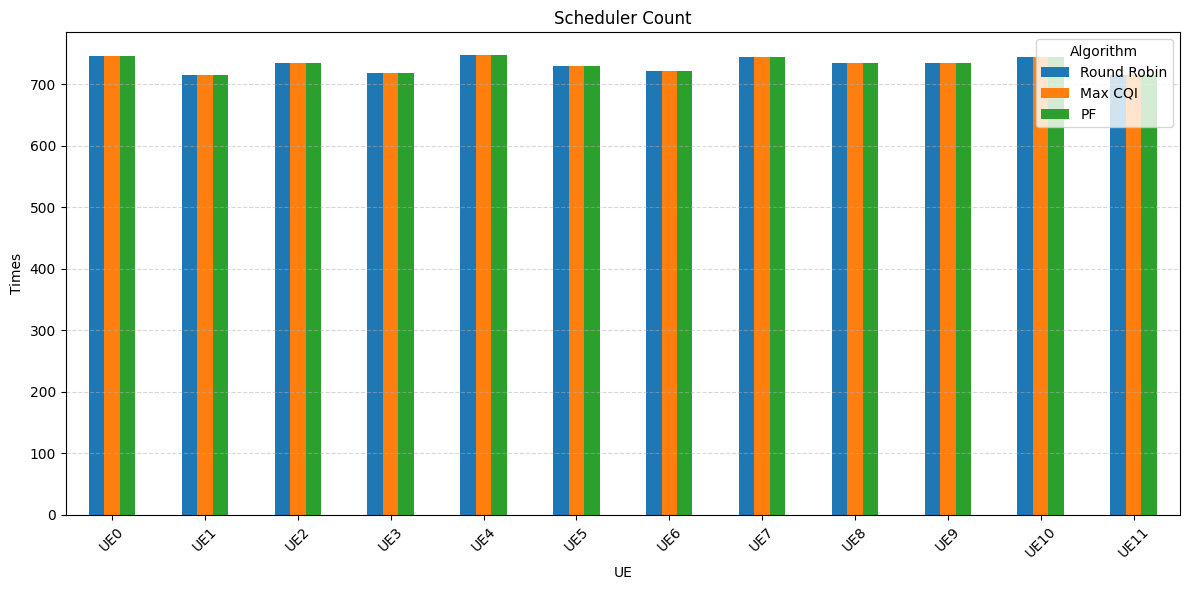

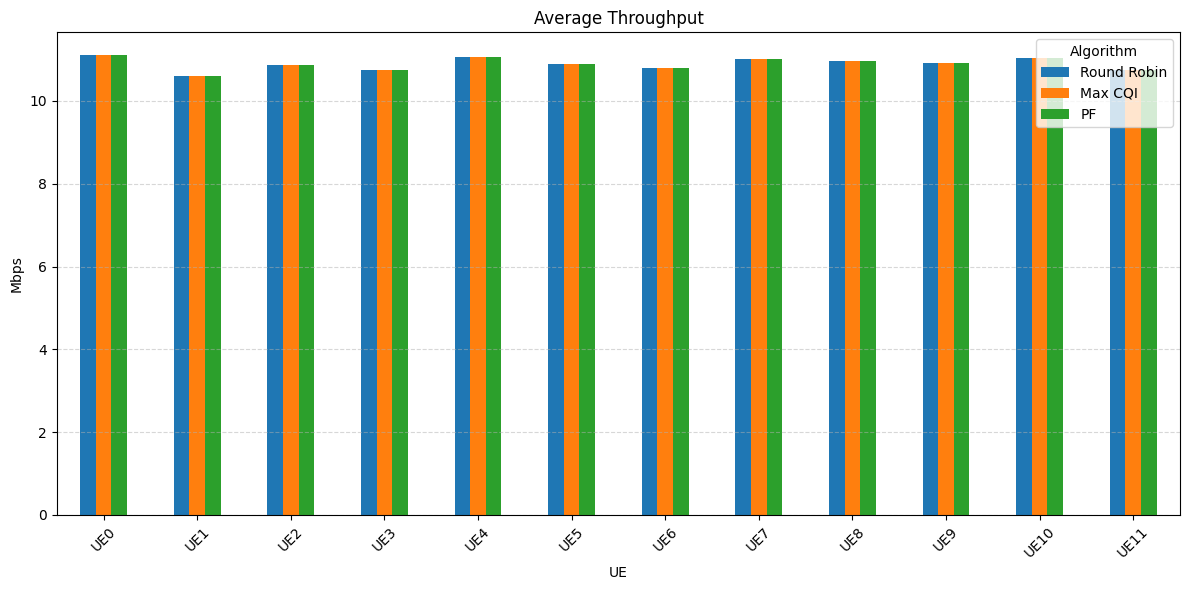

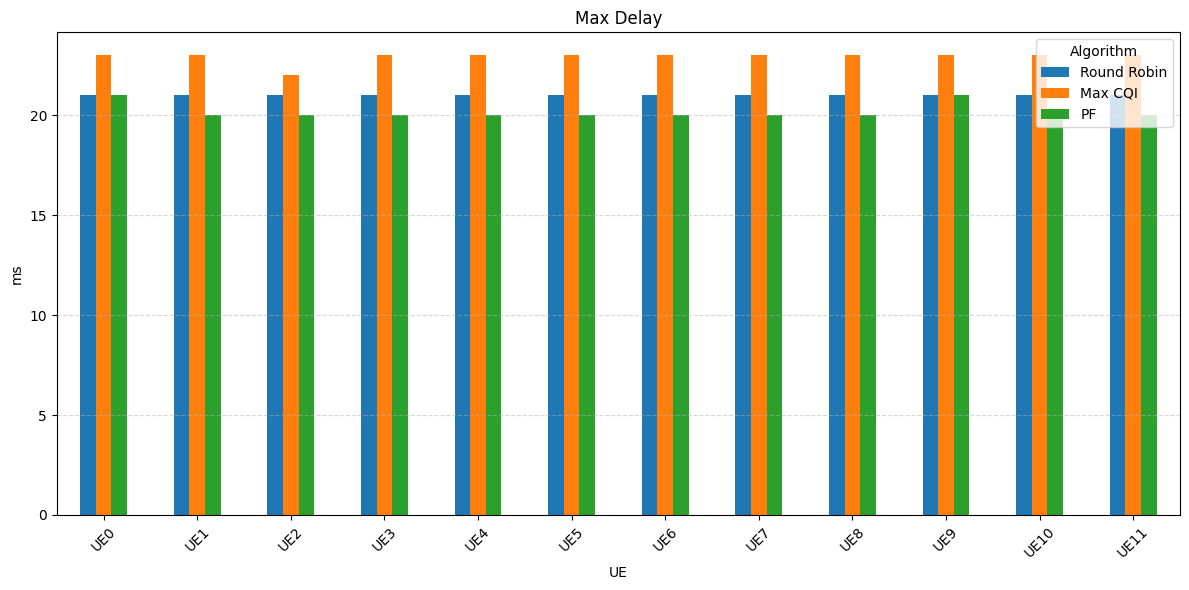

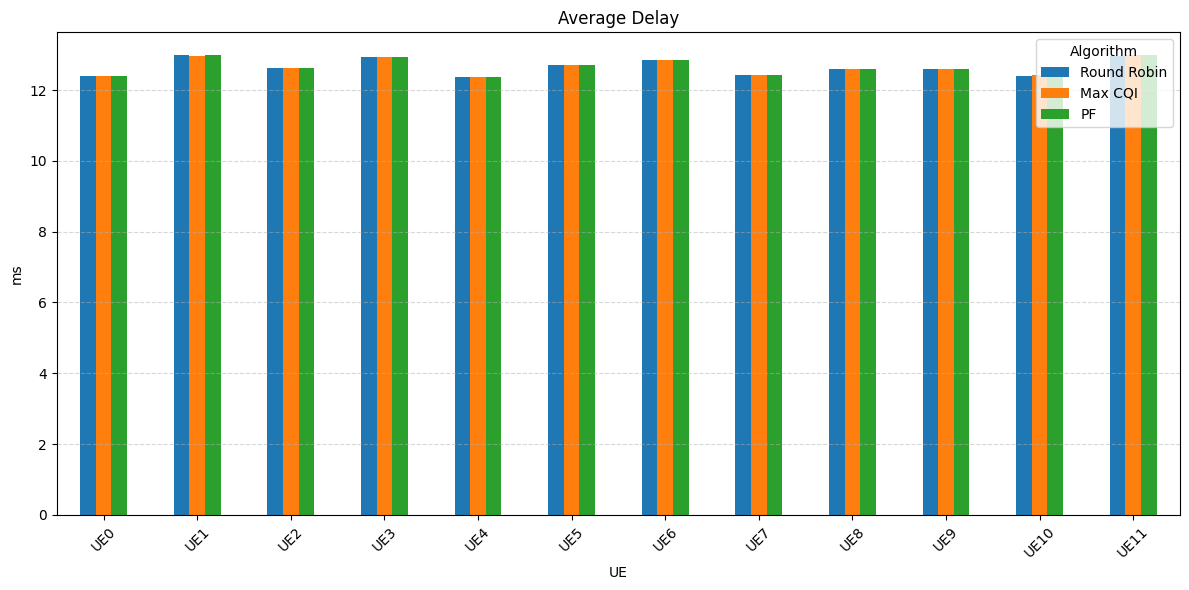

In [23]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF5.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF5.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF5.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF5.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## Total Throughput

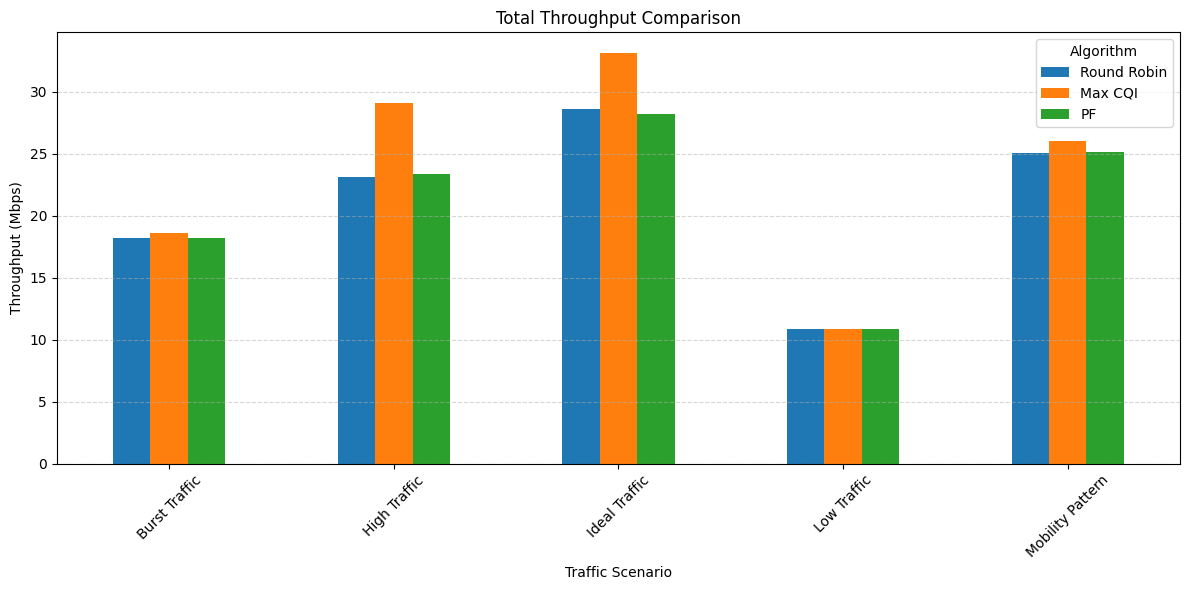

In [24]:

total_throughput_DF1.plot(kind='bar', figsize=(12, 6))

plt.title("Total Throughput")
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Traffic Scenario")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()